In [1]:
# Step 1: Install necessary libraries (if not already installed)
!pip install xgboost seaborn --quiet


In [2]:
# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [3]:
# Step 3: Load your dataset
df = pd.read_csv('/content/matches.csv')

In [4]:
# Step 4: Clean the data
df = df.dropna(subset=['match_winner', 'team1', 'team2'])

In [5]:
# Lowercase and strip all relevant text fields
for col in ['team1', 'team2', 'match_winner']:
    df[col] = df[col].astype(str).str.lower().str.strip()

In [6]:
# Step 5: Encode team names using a shared encoder
le = LabelEncoder()
all_teams = pd.unique(df[['team1', 'team2', 'match_winner']].values.ravel())
le.fit(all_teams)

df['team1_enc'] = le.transform(df['team1'])
df['team2_enc'] = le.transform(df['team2'])
df['winner_enc'] = le.transform(df['match_winner'])

In [7]:
# Step 6: Split the data and train the model
X = df[['team1_enc', 'team2_enc']]
y = df['winner_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:21:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [9]:
# Step 7: Make a prediction for a specific match (team A vs team B)
# You can change these names as needed
team_a = 'pbks'.lower()
team_b = 'rcb'.lower()

# Encode the team names
team_a_enc = le.transform([team_a])[0]
team_b_enc = le.transform([team_b])[0]


In [10]:
# Predict the winner
pred = model.predict([[team_a_enc, team_b_enc]])
winner = le.inverse_transform(pred)[0]
print(f"🏆 Predicted Winner for IPL 2025 Final between {team_a.upper()} and {team_b.upper()}: {winner.upper()}")


🏆 Predicted Winner for IPL 2025 Final between PBKS and RCB: PBKS


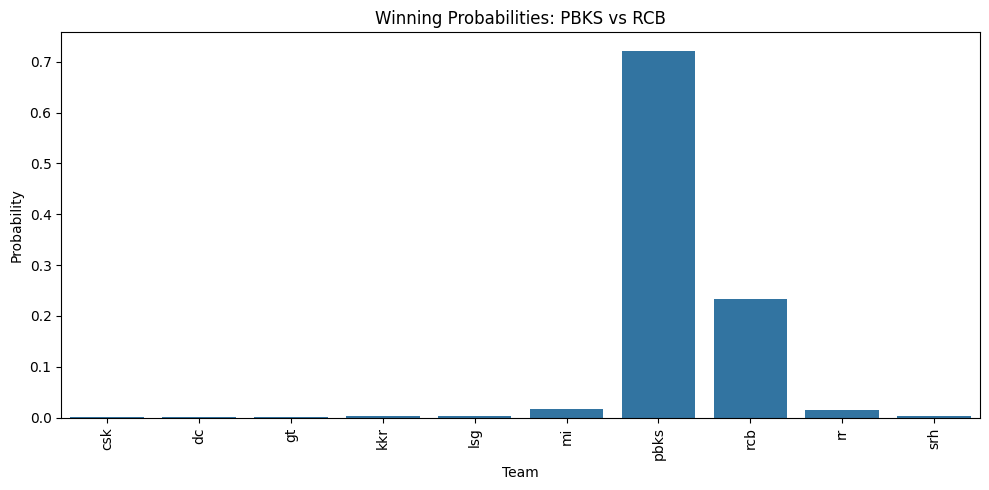

In [11]:
# Step 8: Visualize predicted probabilities (same input as prediction)
probs = model.predict_proba([[team_a_enc, team_b_enc]])[0]
teams = le.classes_

plt.figure(figsize=(10, 5))
sns.barplot(x=teams, y=probs)
plt.xticks(rotation=90)
plt.title(f"Winning Probabilities: {team_a.upper()} vs {team_b.upper()}")
plt.ylabel("Probability")
plt.xlabel("Team")
plt.tight_layout()
plt.show()